## Exploratory Data Analysis

In [43]:
#importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Standard ML Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [24]:
#importing the dataset
student = pd.read_csv("student-mat.csv")
student.shape

(395, 33)

In [25]:
#Displaying first few rows of the dataset
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [26]:
#looking the features.
student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Distribution of the output variable

In [27]:
student["G3"].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

Text(0.5, 1.0, 'Distribution of final grade')

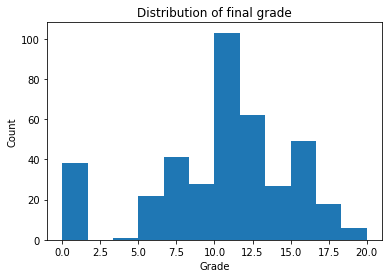

In [28]:
#Hisrogram of the final grade
plt.hist(student['G3'],bins =12)
plt.xlabel("Grade");plt.ylabel("Count");plt.title("Distribution of final grade")

In [29]:
student['address'].unique()

array(['U', 'R'], dtype=object)

Text(0.5, 1.0, 'Density plot for final grades by location')

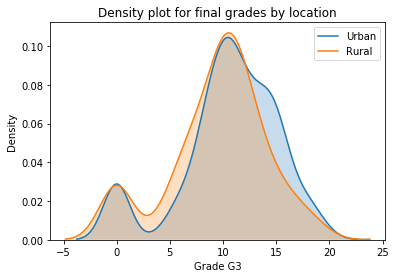

In [61]:
#Grade distribution for grade by address. 
sns.kdeplot(student.loc[student["address"]=="U","G3"],label='Urban', shade = True)
sns.kdeplot(student.loc[student["address"]=="R","G3"],label='Rural',shade = True)
plt.xlabel("Grade G3")
plt.ylabel("Density")
plt.title("Density plot for final grades by location")

The actual values of a density plot are difficult to interpret. But the shapes of the plots can be used for comparision. The location doesnot seem to have substantial impact on the student grades.

The Guardian doesnot seem to have substantial impact on the student grades

The density plot can be checked for each and every categorical variable with the output variable. Also we can look into the correlation using the dummy variable. Looking for the other variables later on

#### Variable Correlations with Final Grade

In [31]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [45]:
#Numerical varialbles
student.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

Correlations can be calculted between numerical values.

In [33]:
#Categorical variables
category_student = student.select_dtypes('object')

In [34]:
category_student.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [35]:
#correlation with one-hot encode
dummy_student = pd.get_dummies(category_student)
dummy_student["G3"] = student["G3"]
dummy_student.corr()["G3"].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

### Data Preparation

In [39]:
data = student.drop(columns =['school', 'G1', 'G2'])

In [42]:
data = data.rename(columns={'G3': 'Grade'})
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,10
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,15
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,10


### Selecting 10 most correlated variables with the final score

In [50]:
data = pd.get_dummies(data)
most_correlated = data.corr().abs()['Grade'].sort_values(ascending=False)
most_correlated = most_correlated[:12]

In [52]:
most_correlated.index

Index(['Grade', 'failures', 'Medu', 'higher_yes', 'higher_no', 'age', 'Fedu',
       'goout', 'romantic_no', 'romantic_yes', 'traveltime', 'Mjob_health'],
      dtype='object')

In [59]:
data = data.loc[:, most_correlated.index]

In [60]:
data.head()

,Grade,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no,romantic_yes,traveltime,Mjob_health
0,6,0,4,1,0,18,4,4,1,0,2,0
1,6,0,1,1,0,17,1,3,1,0,1,0
2,10,3,1,1,0,15,1,2,1,0,1,0
3,15,0,4,1,0,15,2,2,0,1,1,1
4,10,0,3,1,0,16,3,2,1,0,1,0


#### Spliting the dataset

In [62]:
labels= data["Grade"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=0)

In [65]:
print(X_train.shape)
print(X_test.shape)

(296, 12)
(99, 12)
